In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import inv
import sympy as sp
from IPython.display import display, Math, display_html
from PIL import Image

import matplotlib.font_manager as font_manager


font_manager.fontManager.addfont("res/NanumHumanRegular.otf")
prop = font_manager.FontProperties(fname="res/NanumHumanRegular.otf")

plt.rcParams["font.family"] = prop.get_name()

# Quadratic Function Fitting using Least Squares

$$y=ax^2+bx+c$$

Find a, b, c  using LS by given 11 2D points, and plot it.

다음 4가지 방식으로:
1. 일반적인 Least Square
2. Weighted Least Square: [1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1]
3. Using left 8 points
4. Using right 8 points


In [2]:
PointsX = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
PointsY = np.array([2.8, 1.0, -1.0, -2.3, -2.7, -3.0, -3.2, -2.0, -1.0, 0.4, 3.0])
Weights = np.array([1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1])

b = sp.Matrix(PointsY)

W = sp.Matrix(np.diag(Weights))
x_view = sp.Matrix([sp.Symbol("a"), sp.Symbol("b"), sp.Symbol("c")])
_A = sp.Symbol("A")
_T = sp.Symbol("T")
_b = sp.Symbol("b")
_W = sp.Symbol("W")

## 1. 일반적인 Least Square

$\boldsymbol{Ax}=\boldsymbol{b}$에서 (실제로는 $\boldsymbol{b}\notin C(A)$)
$$\boldsymbol{x} = (\boldsymbol{A}^T \boldsymbol{A})^{-1} \boldsymbol{A}^T \boldsymbol{b}$$
로 $\boldsymbol{x}$를 구할 수 있음.

In [3]:
A1 = sp.Matrix(np.stack([PointsX ** 2, PointsX, np.ones(PointsX.shape)], axis=1))

x: sp.Matrix = (A1.T @ A1).inv() @ A1.T @ b

display(sp.Equality(sp.MatMul(A1, x_view), b, evalueate=False))

display(sp.Equality(x_view, x))

Eq(Matrix([
[25.0, -5.0, 1.0],
[16.0, -4.0, 1.0],
[ 9.0, -3.0, 1.0],
[ 4.0, -2.0, 1.0],
[ 1.0, -1.0, 1.0],
[ 0.0,  0.0, 1.0],
[ 1.0,  1.0, 1.0],
[ 4.0,  2.0, 1.0],
[ 9.0,  3.0, 1.0],
[16.0,  4.0, 1.0],
[25.0,  5.0, 1.0]])*Matrix([
[a],
[b],
[c]]), Matrix([
[ 2.8],
[ 1.0],
[-1.0],
[-2.3],
[-2.7],
[-3.0],
[-3.2],
[-2.0],
[-1.0],
[ 0.4],
[ 3.0]]))

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[   0.24044289044289],
[-0.0118181818181818],
[  -3.13170163170163]]))

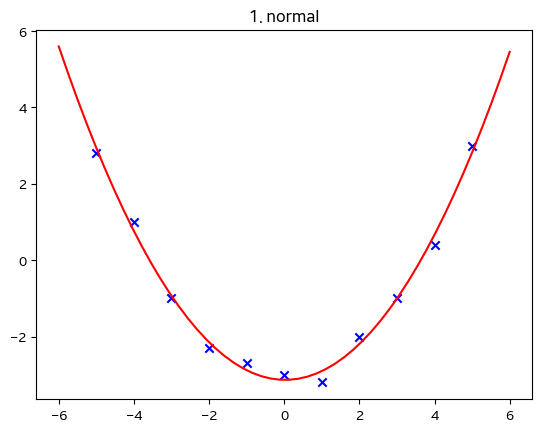

In [4]:
X = np.linspace(-6, 6)
Y = x[0] * X ** 2 + x[1] * X + x[2]

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.title("1. normal")
plt.plot(X, Y, color='red')

plt.show()

## 2. Weighted Least Square

$\boldsymbol{WAx} = \boldsymbol{Wb}$

In [5]:
A2 = W @ A1

wb = W * b

xw = (A2.T @ A2).inv() @ A2.T @ wb

display(sp.Unequality(sp.MatMul(sp.MatMul(_W, A1), x_view), sp.MatMul(_W, b)))
display(sp.Equality(_W, W, evaluate=False))

Ne((W*Matrix([
[25.0, -5.0, 1.0],
[16.0, -4.0, 1.0],
[ 9.0, -3.0, 1.0],
[ 4.0, -2.0, 1.0],
[ 1.0, -1.0, 1.0],
[ 0.0,  0.0, 1.0],
[ 1.0,  1.0, 1.0],
[ 4.0,  2.0, 1.0],
[ 9.0,  3.0, 1.0],
[16.0,  4.0, 1.0],
[25.0,  5.0, 1.0]]))*Matrix([
[a],
[b],
[c]]), W*Matrix([
[ 2.8],
[ 1.0],
[-1.0],
[-2.3],
[-2.7],
[-3.0],
[-3.2],
[-2.0],
[-1.0],
[ 0.4],
[ 3.0]]))

Eq(W, Matrix([
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]))

In [6]:
display(sp.Equality(x_view, xw))

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[   0.239604534329512],
[-0.00263157894736848],
[   -3.12009532397269]]))

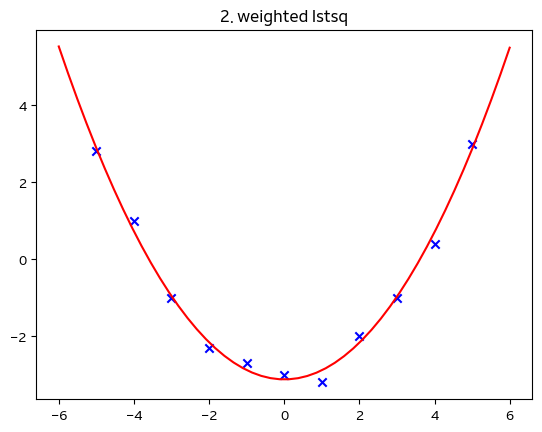

In [7]:
X = np.linspace(-6, 6)
Y = xw[0] * X ** 2 + xw[1] * X + xw[2]

plt.scatter(PointsX, PointsY, c='blue', marker='x')

plt.title("2. weighted lstsq")
plt.plot(X, Y, color='red')

plt.show()

## 3. Using left 8

In [8]:
A3 = sp.Matrix(np.stack([PointsX[:8] ** 2, PointsX[:8], np.ones(PointsX[:8].shape)], axis=1))

x3 = (A3.T @ A3).inv() @ A3.T @ b[:8, :]
display(sp.Equality(x_view, x3))

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[    0.24047619047619],
[-0.00476190476190536],
[   -3.11071428571428]]))

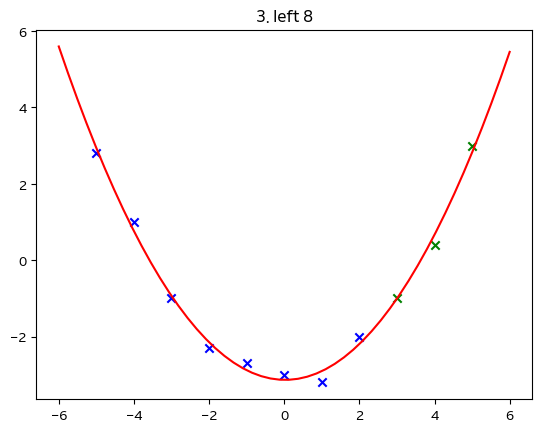

In [9]:
X = np.linspace(-6, 6)
Y = x3[0] * X ** 2 + x[1] * X + x[2]

plt.scatter(PointsX[0:8], PointsY[0:8], c='blue', marker='x')
plt.scatter(PointsX[8:], PointsY[8:], c='green', marker='x')

plt.title("3. left 8")
plt.plot(X, Y, color='red')

plt.show()

## 4. Using right 8

In [10]:
A4 = sp.Matrix(np.stack([PointsX[3:] ** 2, PointsX[3:], np.ones(PointsX[3:].shape)], axis=1))

x4 = (A4.T @ A4).inv() @ A4.T @ b[3:, :]
display(sp.Equality(x_view, x4))

Eq(Matrix([
[a],
[b],
[c]]), Matrix([
[  0.241666666666667],
[-0.0130952380952374],
[  -3.14285714285714]]))

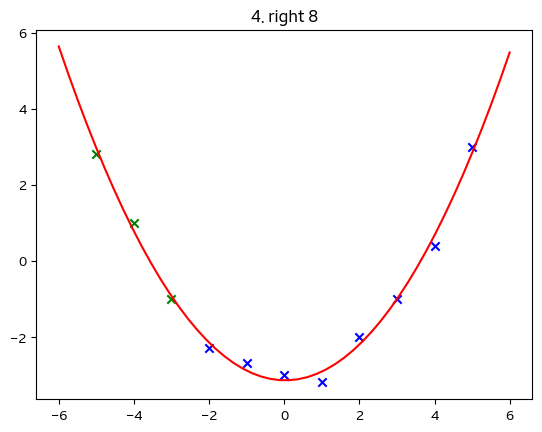

In [11]:
X = np.linspace(-6, 6)
Y = x4[0] * X ** 2 + x4[1] * X + x4[2]

plt.scatter(PointsX[3:], PointsY[3:], c='blue', marker='x')
plt.scatter(PointsX[:3], PointsY[:3], c='green', marker='x')

plt.title("4. right 8")
plt.plot(X, Y, color='red')


plt.show()

# Multi-lines Fitting using Least Squares

$y=ax+b$

Find $a$, $b$ using LS: Find the intersections of red and green respectively.

## How to do?
1. Select some 2D points at pixel coordinates on the same line, and find the optimal line equation using LS
2. Repeat 1 for other lines in the same direction
3. Find the intersections of lines in (1)-(2) in the same direction
4. Repeat (1)-(3) for other directions(red/green)

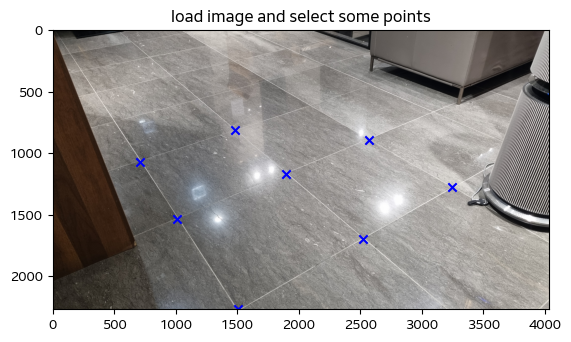

In [12]:
iX = np.array([708, 1485, 1012, 1894,  2568,1508, 2520, 3246])
iY = np.array([1067, 813, 1533, 1169, 894,2267, 1693, 1277])
with Image.open("line_fitting.jpg") as im:
    plt.imshow(im)

plt.title("load image and select some points")
plt.scatter(iX, iY, marker='x', c='blue')
plt.show()


In [13]:
rl1ind = [0, 2, 5]
rl1A = np.stack([iX[rl1ind], np.ones_like(iX[rl1ind])], axis=1)
rl2ind = [1, 3, 6]
rl2A = np.stack([iX[rl2ind], np.ones_like(iX[rl2ind])], axis=1)

gl1ind = [2, 3, 4]
gl1A = np.stack([iX[gl1ind], np.ones_like(iX[gl1ind])], axis=1)
gl2ind = [5, 6, 7]
gl2A = np.stack([iX[gl2ind], np.ones_like(iX[gl2ind])], axis=1)

rl1x = inv(rl1A.T @ rl1A) @ rl1A.T @ iY[rl1ind].T
rl2x = inv(rl2A.T @ rl2A) @ rl2A.T @ iY[rl2ind].T

gl1x = inv(gl1A.T @ gl1A) @ gl1A.T @ iY[gl1ind].T
gl2x = inv(gl2A.T @ gl2A) @ gl2A.T @ iY[gl2ind].T

print(f"redlines: {rl1x}, {rl2x}")
print(f"greenlines: {gl1x}, {gl2x}")

redlines: [ 1.49803768 10.4447933 ], [   0.84914333 -444.69883377]
greenlines: [-4.10770321e-01  1.94818558e+03], [-5.69466633e-01  3.12643343e+03]


In [14]:
# find intersection; suppose delta grad of lines != 0 

rl_intersect = -(rl1x[1] - rl2x[1])/(rl1x[0] - rl2x[0])
gl_intersect = -(gl1x[1] - gl2x[1])/(gl1x[0] - gl2x[0])

print(f"redline intersect: ({rl_intersect}, {rl1x[0] * rl_intersect + rl1x[1]})")
print(f"greenline intersect: ({gl_intersect}, {gl1x[0] * gl_intersect + gl1x[1]})")

redline intersect: (-701.4140732926402, -1040.2999153942956)
greenline intersect: (7424.544602554563, -1101.5969884102585)


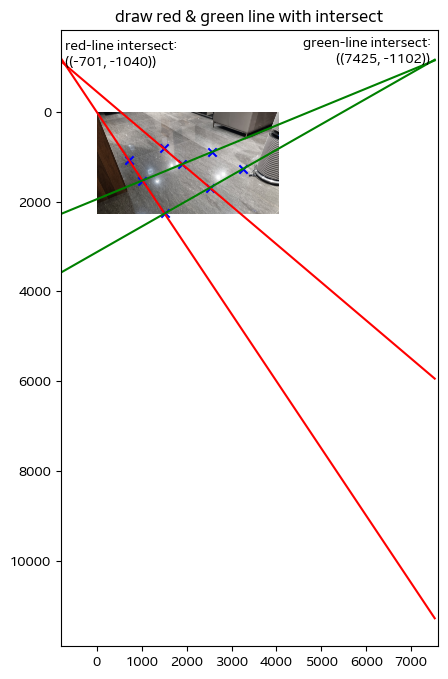

In [15]:
sX = np.linspace(rl_intersect- 100, gl_intersect + 100)
rl1 = sX * rl1x[0] + rl1x[1]
rl2 = sX * rl2x[0] + rl2x[1]

gl1 = sX * gl1x[0] + gl1x[1]
gl2 = sX * gl2x[0] + gl2x[1]

plt.figure(figsize=(10, 8))

with Image.open("line_fitting.jpg") as im:
    plt.imshow(im)


plt.scatter(iX, iY, marker='x', c='blue')
plt.plot(sX, rl1, c='red')
plt.plot(sX, rl2, c='red')
plt.plot(sX, gl1, c='green')
plt.plot(sX, gl2, c='green')

plt.xlim((-800, 7600))
plt.title("draw red & green line with intersect")
plt.text(rl_intersect, rl1x[0] * rl_intersect + rl1x[1], f"red-line intersect:\n({round(rl_intersect), round(rl1x[0] * rl_intersect + rl1x[1])})")
plt.text(gl_intersect, gl1x[0] * gl_intersect + gl1x[1], f"green-line intersect:\n({round(gl_intersect), round(gl1x[0] * gl_intersect + gl1x[1])})", horizontalalignment='right')
plt.show()